Bayesian Regression
------

<center><img src="https://i.stack.imgur.com/u5HhK.png" width="500"/></center>

By The End Of This Session You Should Be Able To:
----

- Define linear regression model
- Explain the extension to Bayesian modeling

What is linear regression?
-----

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png" height="500"/></center>

Am approach for modeling the __straight-line relationship__ between a response/outcome/dependent variable y and one or more explanatory/covariates/independent variables.


__Simple linear regression__: only one explanatory variable

__Multiple linear regression__: more than one explanatory variable

Check for understanding
-----

Linear regression is just the fancy term for finding the line of best fit. How do we measure "best fit"?

The residual sum of squares (RSS), which is the sum of the squared differences between the outputs and the linear regression estimates.

We need to minimize some kind of error function. 

The most popular method to do this is via ordinary least squares (OLS). 

Linear Regression Formalism
------

$$y_i = \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} + \varepsilon_i$$
or  
$$y = X \beta + \varepsilon$$

Data is modeled as Fit + Residual

$$y = X \beta + \varepsilon$$

$y = \begin{bmatrix} y_1 \\y_2 \\ \vdots \\ y_n \end{bmatrix}$, 
    $X = \begin{bmatrix} 1 & x_{11} & \dots & x_{1p} \\ 1 & x_{21} & \dots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \dots & x_{np} \end{bmatrix}$, 
    $\beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix}$, 
    $\varepsilon = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix}$

$n$: sample size  
$p$: number of explanatory variables / predictors  

Regression models the conditional distribution
-----

p(y | θ, x)

Fitting Linear Regression
-----

Find MLE with the Moore-Penrose pseudoinverse / Normal Equation:

$$\hat{\beta} = ({\bf{X^{T}X}})^{-1}{\bf{X^{T}y}}$$



Check for understanding
-----

What are the limitations of the Normal Equation (and MLE in general)?

The OLS estimate of β is a point estimate and prone to overfitting. 

Bayesian regression formalism
-----

Given: 

$$y = \beta{\bf{x}} + {\bf{e}}$$


<center><img src="images/br.png" width="500"/></center>

The response data points y are sampled from a multivariate normal distribution that has a mean equal to the product of the β coefficients and the predictors, X, and a variance of σ<sup>2</sup>.

Advantages of defining y from distribution
-----

1. Prior Distrubtions - in β
2. Posterior Distrubtions - model entire distribution, larger variances mean more uncertainity

Non-informative priors
-----

<center><img src="images/flat.png" width="700"/></center>

Bayesian regression setup
-----

However we do __not__ know β and σ<sup>2</sup>, we need to sample from p(β, σ<sup>2</sup>|y)



Construct and Sample from posterior
-----

<center><img src="images/sampling.png" width="700"/></center>

Markov Chain Monte Carlo (MCMC)
-------

Markov Chain - memoryless  
Monte Carlo - "random" search

Markov Chain Monte Carlo (MCMC)
-------

Memoryless search performed with intelligent jumps

MCMC Sampling Steps
------

1) Assume a functional form (probability distribution) for parameters θ according to hyperparameters α


2) 'Sample' this joint probability distribution to get a vector of single values for θ across d


3) Compute the posterior predictions ŷ for observed datapoints and compare to the ground truth y using a loss function



4) Update the joint θ distributions according to the new density of samples


5) Repeat the sampling and evaluation a bunch more times (100x - 10,000x), seeking to take progressively better samples of θ according to minimising the loss function, and arriving at convergence where any new samples don't improve the loss

The MCMC sampling form: Markov-Chain 
-------

The position of step n+1 is dependent only upon the position of step n, and otherwise independent of all other steps.

Moves around the joint distribution in a semi-random manner, the distance and direction decided according tos pecific rules of the sampling method:

- Gradient-seeking
- Momentum
- Randomness (the Monte-Carlo part)

Other flavors of Bayesian regression
-----

- Logistic
- Poisson
- GLM

<center><img src="http://www.marketingdistillery.com/wp-content/uploads/2014/11/TheThreeRegressions.png" width="500"/></center>


Bayesian Logistic Regression
-----

<center><img src="images/log.png" width="500"/></center>

Summary
-----

- Linear regression is the most popular type of analytic modeling in the world.
- There is a logical extension to Bayesian by adding distributional weights to the parameters.
- However often there is no longer closed-form solutions so we must numerical approximation with sampling.
- MCMC is one convenient method of sample that take random steps that progressively approximates the posterior distributions

----
Bonus Material
----

The maximum a posteriori (MAP) estimate of β is equivalent to ridge regression

Bayesian regression
-----

Consider the idea that the error vector ${\bf{e}}$ is a gaussian distribution with a mean around 0. Note that the variance term $\sigma^{2}$ is a covariance matrix:

$${\bf{e}} \sim N(0, \sigma^{2})$$

This is a response signal with a linear mean and a variance of magnitude $\sigma$. Now we consider the collection of data $Y=y_{i}$ paired with $X=x_{i}$, so as to make a reorderable collection of pairs $(y_{i},x_{i})$ 

$$p({\bf{Y}} |\ {\bf{X}}, \beta, V) = \Pi_{i}p(y_{i}|\ x_{i},\beta,\sigma^{2})$$

Note that this is the product of independent probabilities. We can reform this equation in matrix form:


$$ = \dfrac{1}{(\sigma^{2})^{\frac{N}{2}}}\text{exp}\left(-\frac{1}{2\sigma^{2}}({\bf{Y}}-\beta{\bf{X}})({\bf{Y}}-\beta{\bf{X}})^{T}\right) $$


## Formation of the conjugate prior: The matrix-normal density

Right now, our information about $\beta$ is really vague. Rewriting an estimator for the term inside the exponential function above using the OLS (Moore-Penrose) pseudoinverse:

$$\hat{\beta} = ({\bf{X^{T}X}})^{-1}{\bf{X^{T}y}}$$

gives us the following expansion which is normal with respect to the error in estimate for $\beta$, $(\beta-\hat{\beta})$:

$$({\bf{Y}}-\beta{\bf{X}})({\bf{Y}}-\beta{\bf{X}})^{T} = ({\bf{y-\hat{\beta}X}})^{T}({\bf{y-\hat{\beta}X}})+(\beta-\hat{\beta})^{T}({\bf{X^{T}X}})(\beta-\hat{\beta})$$

Now we can rewrite the likelihood:

$$p({\bf{y}}|{\bf{X}},\beta,\sigma^{2}) \propto (\sigma^2)^{-\frac{v}{2}} \exp\left(-\frac{vs^{2}}{2{\sigma}^{2}}\right)(\sigma^2)^{-\frac{n-v}{2}} \exp\left(-\frac{1}{2{\sigma}^{2}}(\beta - \hat{\beta})^{\rm T}({\bf{X}}^{T}{\bf{X}})(\beta - \hat{\beta})\right)$$

Given that

$$vs^{2} =(\mathbf{y}- \hat{\beta}\mathbf{X} )^{\rm T}(\mathbf{y}- \hat{\beta}\mathbf{X} ) \quad  \text{ and } \quad v = n-k$$

where $k$ is the number of regression coefficients.


This suggests a form for the prior:

$$p(\beta,\sigma^{2}) = p(\beta|\sigma^{2})p(\sigma^{2})$$

The conditional prior must be matrix-normal:

$$p(\beta|\sigma^{2}) \propto (\sigma^2)^{-\frac{k}{2}} \exp\left(-\frac{1}{2{\sigma}^{2}}(\beta - \mu_0)^{\rm T} \mathbf{\Lambda}_0 (\beta - \mu_0)\right)$$

Where the $\Lambda_{0}$ is a matrix of variance magnitudes (what does this remind you of)

And $p(\sigma^{2})$ is an [inverse gamma distribution](https://en.wikipedia.org/wiki/Inverse-gamma_distribution):

$$p(\sigma^{2}) \propto \dfrac{1}{(\sigma^2)^{\frac{v_{0}}{2}+1}} \exp\left(-\frac{v_{0}s_{0}^{2}}{2{\sigma}^{2}}\right)$$

In simple notation, we'd write this as the matrix normal: $N(\mu_{0}, \sigma^{2}\Lambda_{0}^{-1})$

## Calculation of the Posterior (Evidence) for the model

Using the simplifications:

$a_0=\tfrac{v_0}{2}$ and $b_0=\tfrac{1}{2}v_0s_0^2 $ with $v_{0}$ and $s_{0}^{2}$ as the prior values of $v$ and $s^{2}$, respectively. We can write the posterior as follows:

$$p(\beta,\sigma^{2}|\mathbf{y},\mathbf{X}) \propto p(\mathbf{y}|\mathbf{X},\beta,\sigma^{2})p(\beta|\sigma^{2})p(\sigma^{2}) $$

$$\propto \dfrac{1}{(\sigma^{2})^{\frac{n}{2}}}\exp\left(-\frac{1}{2{\sigma}^{2}}(\mathbf{y}- \mathbf{X}\beta)^{\rm T}(\mathbf{y}- \mathbf{X}\beta)\right) \dfrac{1}{(\sigma^{2})^{\frac{k}{2}}}\exp\left(-\frac{1}{2{\sigma}^{2}}(\beta -\mu_0)^{\rm T} \boldsymbol\Lambda_0 (\beta - \mu_0)\right)  \dfrac{1}{(\sigma^2)^{a_0+1}} \exp\left(-\frac{b_0}{{\sigma}^{2}}\right)$$

With some re-arrangement, the posterior can be re-written so that the posterior mean $\mu_n$ of the parameter vector $\beta$ can be expressed in terms of the least squares estimator $\hat{\beta}$ and the prior **coefficient** mean $\mu_0$, with the strength of the prior indicated by the prior matrix of variances $\Lambda_0$

To justify that $\mu_n$ is indeed the posterior **coefficient** mean, the quadratic terms in the exponential can be re-arranged in [quadratic form](https://en.wikipedia.org/wiki/Quadratic_form) about $\beta-\mu_n$.

$(\mathbf{y}- \mathbf{X} \beta)^{\rm T}(\mathbf{y}- \mathbf{X} \beta) + (\beta - \mu_0)^{\rm T}\boldsymbol\Lambda_0(\beta - \mu_0) =(\beta - \mu_n)^{\rm T}(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)(\beta - \mu_n)+\mathbf{y}^{\rm T}\mathbf{y}-\mu_n^{\rm T}(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)\mu_n+\mu_0^{\rm T}\boldsymbol\Lambda_0\mu_0$

Now we can rewrite the posterior as a normal multiplied by an inverse-gamma distribution with different coefficients:

$p(\beta,\sigma^{2}|\mathbf{y},\mathbf{X}) \propto \dfrac{1}{(\sigma^2)^{\frac{k}{2}}}\exp\left(-\dfrac{1}{2{\sigma}^{2}}(\beta - \mu_n)^{\rm T}(\mathbf{X}^{\rm T}\mathbf{X}+\mathbf{\Lambda}_0)(\beta - \mu_n)\right) \dfrac{1}{(\sigma^2)^{\frac{n+2a_{0}}{2}+1}}\exp\left(-\dfrac{2 b_0+\mathbf{y}^{\rm T}\mathbf{y}-\mu_n^{\rm T}(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)\mu_n+\mu_0^{\rm T}\boldsymbol\Lambda_0\mu_0}{2{\sigma}^{2}}\right)$

This can be interpreted as Bayesian learning where the parameters are updated according to the following equations.

$ \mu_n=(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)^{-1} (\boldsymbol\Lambda_0\mu_0+\mathbf{X}^{\rm T}\mathbf{X}\hat{\beta})=(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)^{-1} (\boldsymbol\Lambda_0\mu_0+\mathbf{X}^{\rm T}\mathbf{y})$

$\boldsymbol\Lambda_n=(\mathbf{X}^{\rm T}\mathbf{X}+\boldsymbol\Lambda_0)$

$a_n= a_0 + \frac{n}{2}$

$b_n= b_0 + \frac{1}{2}(\mathbf{y}^{\rm T}\mathbf{y}+\mu_0^{\rm T}\boldsymbol\Lambda_0\mu_0-\mu_n^{\rm T}\boldsymbol\Lambda_n\mu_n) $

These can be solved with Bayesian updating.

The special case $\mu_0=0$, $\mathbf{\Lambda}_0 = c\mathbf{I}$ is called [(Bayesian) ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization). 

## Producing a solution to the above math


It's not difficult to see that the above model is difficult to interpret for the purpose of writing an optimization, so we are going to make some substitutions at this point to reduce the pain of finding an actual solution with a computer.

There are a few different ways of getting clear solutions. 

### The de facto MAP estimate

For simple cases, we can make a computation directly that closely resembles the OLS estimate of $\hat{\beta}$.

Starting with an *a priori* estimate of $\boldsymbol \Lambda_{0}$ (this is a diagonal matrix with the inverse of each $\lambda_{0}^{i}$ positioned on the diagonal) and $\sigma^{2}$, we can construct the posterior directly:

$\boldsymbol \Lambda_{0} = \begin{bmatrix}
                    \frac{1}{\lambda_{1}} & 0 & \cdots & 0 \\ 
                    0 & \frac{1}{\lambda_{2}} & \cdots & 0 \\
\vdots & \cdots & \cdots & \cdots \\
0 & 0 & \cdots & \frac{1}{\lambda_{n}}
                    \end{bmatrix}$


$\beta_{0} = \sigma^{2}\boldsymbol\Lambda_{0}\mu_{0}$

An estimate of beta is formed from the above equations

$\hat{\beta_{n}} = \mu_{n} = (\mathbf{X}^{\rm T}\mathbf{X}+\sigma^{2}\boldsymbol\Lambda_{0})^{-1}(\mathbf{X}^{\rm T}\mathbf{y}+\beta_{0})$

To make a prediction $\hat{y}$, we just use the math above:

$\hat{y} = \boldsymbol X \hat{\beta_{n}}$

### The Objective Estimate

In professional settings, the above estimate is not often computed, and rather a computationally simpler method is used altogether.

We instead make the following simplifications. First recalling back to your linear algebra, it should be obvious to you that $\boldsymbol \Lambda_{0}$ is a description of variance. It should also be further understood that the observed quantities ${\bf{X}}$  (the actual data) are actually the **posterior**. We can estimate these with a QR decomposition:

${\bf X} = {\bf QR}$

$({\bf{X}^{\rm T}X} + \sigma^{2} \boldsymbol \Lambda_{0})^{-1} \sim ({\bf{X}^{\rm T}X})^{-1} = ({\bf{QR}^{\rm T}QR})^{-1} = ({\bf{R}^{\rm T}{Q}^{\rm T}QR})^{-1} = ({\bf{R}^{\rm T}R})^{-1} = {\bf R}^{\rm -1}(\bf R^{\rm T})^{-1} $

$(\mathbf{X}^{\rm T}\mathbf{y}+\beta_{0}) \sim \mathbf{X}^{\rm T}\mathbf{y} = {\bf R^{\rm T}Q^{\rm T}}\bf y$


$\hat{\beta_{n}} = \mu_{n} = (\mathbf{X}^{\rm T}\mathbf{X}+\sigma^{2}\boldsymbol\Lambda_{0})^{-1}(\mathbf{X}^{\rm T}\mathbf{y}+\beta_{0}) ={\bf R^{-1}Q^{\rm T}y}$


[[ 26.01204318]
 [  3.24416574]]


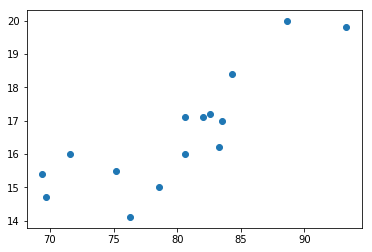

In [1]:
chirps = [20., 16., 19.8, 18.4, 17.1, 15.5,14.7,17.1,15.4,16.2, 15., 17.2, 16., 17., 14.1]
temp = [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82., 69.4, 83.3, 78.6, 82.6, 80.6, 83.5, 76.3]
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
%matplotlib inline

# now try to predict chirps with temp

plt.scatter(temp, chirps)
x = np.expand_dims(chirps,axis=1)
ones = np.ones(shape=(len(chirps),1))

X = np.hstack((ones,x)) #this is your design matrix
n = X.shape[0]
k = X.shape[1]

y = np.expand_dims(temp, axis=1)

Q, R = np.linalg.qr(X)
RInv = np.linalg.inv(R)
RtInv = np.linalg.inv(R.T)
V_beta = RInv.dot(RtInv)
Beta_hat = RInv.dot(Q.T.dot(y))
df = n-k 
e=y-X.dot(Beta_hat) # error vector = difference in predictions
s2 = np.sum(e.T.dot(e))/df # sum of squared errors!

# Now we produce a simulation of the posterior values of the weights

n_sims = 100000
sigma = np.reshape(np.sqrt(st.invgamma.rvs(a=df/2.,scale=1./(df*s2/2.), size=n_sims)),(-1,1))
B_sims = np.repeat(Beta_hat.T,n_sims,axis=0)+sigma*np.random.multivariate_normal(mean=np.zeros(2),cov=V_beta,size=(n_sims,))
print(Beta_hat)

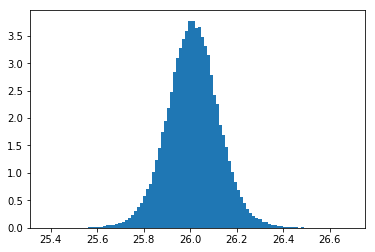

In [2]:
B0_hist = plt.hist((B_sims[:,0]),bins=100,normed=True);


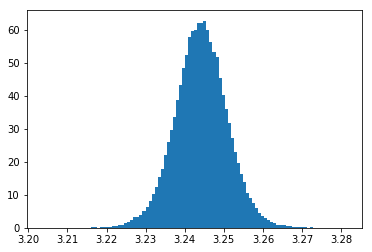

In [3]:
B1_hist = plt.hist((B_sims[:,1]),bins=100,normed=True);

Naturally, these estimates can be used to predict credibility intervals for the values of $\beta$, and can also be used to create credibility envelopes for the the prediction (by taking the values at the edges of the credibility and using these to plot the edges of the envelope).

## Other types of regressions - 

There are literally dozens of types of regressions that use a MAP estimate but different types of models of noise and stochasiticity in variables. These fall under the aegis of **Generalized Linear Models**. We will consider these later.